In [1]:
def Print_values(a,b,c):    
    if (a>b):
        if (b>c):
            x,y,z=a,b,c
        elif (a>c):
            x,y,z=a,c,b
        else:
            x,y,z=c,a,b
    elif (b>c):
        if (a>c):
            x,y,z=a,c,b
        else:
            x,y,z=c,a,b
    else:
        x,y,z=c,b,a
    print('[x,y,z]:',[x,y,z],'\n','x+y-10*z:',x+y-10*z)
Print_values(10,5,1)

[x,y,z]: [10, 5, 1] 
 x+y-10*z: 5


In [2]:
def Fun(x):
    import math
    xx=[x]
    F=[1]
    n=0
    #将x迭代需要算的F得到即xx
    while x>3:
        x=math.ceil(x/3)  
        xx.append(x)
    #从xx最小开始往上迭代得到最后结果
    for j in reversed(xx):
        F.append(F[n]+2*j)
        n=n+1
    return F[n]
#验证
print('验证F（5）：',Fun(5))

验证F（5）： 15


In [3]:
#本函数存储空间小（最大数组仅52个整数即最终3.2需要的列表），计算速度较快（一点就出全部所需数据，可针对更多骰子，无需遍历具体排列情况），为数学计算方法
def Find_number_of_ways(x):
    import math
    import numpy as np
    #先定义了两个骰子时候10-20的对应的方法数
    f=np.array([0,1,2,3,4,5,6,5,4,3,2,1])
    #用fun与f不断交替存储不同骰子对应方法数
    fun=np.array([0])
    #添加骰子数
    for i in range(3,11):
        #骰子和的情况为骰子数*1-骰子数*6，对中心对称，因此只需要算一半后对称得到全部
        for j in range(1,math.floor(3.5*i)-i+2):
            if j<6:
                fun=np.append(fun,sum(f[1:j+1]))
            else:
                fun=np.append(fun,sum(f[j-5:j+1]))
        #最高数有可能对应1个或者两个，进行分情况
        if i%2==0:
             fun1=np.delete(fun,[-1])
        else:
             fun1=fun
        fun=np.append(fun,np.flip(fun1))
        f=fun
        fun=np.array([0])
    f=np.delete(f,[0,-1])
    print("the number of ways to get sum x:",f[x-10],'\n',"Number_of_ways:",f.tolist(),'\n',"The x yields the maximum of Number_of_ways:",np.argmax(f)+10)
#输入总数和x，得到第一个为对于方法数，第二个为10-60的各个情况，第三个是最高数对应的骰子和
Find_number_of_ways(30)

the number of ways to get sum x: 2930455 
 Number_of_ways: [1, 10, 55, 220, 715, 2002, 4995, 11340, 23760, 46420, 85228, 147940, 243925, 383470, 576565, 831204, 1151370, 1535040, 1972630, 2446300, 2930455, 3393610, 3801535, 4121260, 4325310, 4395456, 4325310, 4121260, 3801535, 3393610, 2930455, 2446300, 1972630, 1535040, 1151370, 831204, 576565, 383470, 243925, 147940, 85228, 46420, 23760, 11340, 4995, 2002, 715, 220, 55, 10, 1] 
 The x yields the maximum of Number_of_ways: 35


验证[1，2，3]： 14.0


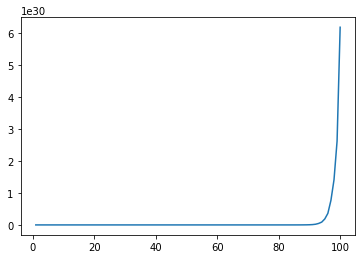

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
#problem4.1
def Random_integer(N):
    return(np.random.randint(0,10,N))

#problem4.2
def ssum(x):
    val1=0
    #先算所有单个数的子集平均值和即自己的和
    val=sum(x)
    #针对不同元素个数的子集进行（不包括个数为1）
    for j in range(1,len(x)):
        #下面几步是对j+1个元素平均的情况，每个元素都会出现m次
        val1=sum(x)/(j+1)
        m=math.factorial(len(x)-1)/math.factorial(len(x)-1-j)/math.factorial(j)
        val1=val1*m
        val=val1+val
    return(val)
#4.2的验证
print('验证[1，2，3]：',ssum([1,2,3]))

#problem4.3
y=np.zeros(100)
n=np.zeros(100)
for N in range(100):
    x=Random_integer(N+1)
    y[N]=ssum(x)
    n[N]=N+1
plt.plot(n,y)

In [5]:
import numpy as np
#problem5.1
def creat(N,M):
    x=np.random.randint(0,2,size=(N,M))
    x[0][0]=1
    x[N-1][M-1]=1
    return(x)
#验证
print('验证生成5*5矩阵：',creat(5,5))

#problem5.2
def Count_path(x):
    #出发点坐标为（0，0），后面不断更新坐标
    xy=np.array([[0,0],[0,0]])
    xy1=np.array([[0,0]])
    N=x.shape[0]
    M=x.shape[1]
    #从左上角到右下角必定走行数-1加列数-1
    for j in range(N+M-2):
        #遍历第j+1步的点
        for i in range(xy.shape[0]-1):
            i=i+1
            #如果该点对应的是1则说明这条路可能可以走故保存它的右侧及下侧点坐标
            if x[int(xy[i,0]),int(xy[i,1])]==1:
                #判断是否超出最右边和最下边
                if xy[i,0]+1<N:
                    xy1=np.append(xy1,[[xy[i,0]+1,xy[i,1]]],axis=0)
                if xy[i,1]+1<M:
                    xy1=np.append(xy1,[[xy[i,0],xy[i,1]+1]],axis=0)            
        xy=xy1
        xy1=np.array([[0,0]])
    return(xy.shape[0]-1)
#验证
x=np.array([[1,0,0,1,0],[1,1,1,1,1],[1,0,1,1,1],[1,0,0,0,1],[0,1,0,1,1]])
print('验证5.2函数可行为3：',Count_path(x))

#problem5.3
val=0
for i in range(1000):
    #创建矩阵
    x=creat(10,8)
    #求矩阵满足要求的路径和
    val=Count_path(x)+val
print('1000次均值：',val/1000)

验证生成5*5矩阵： [[1 0 1 0 1]
 [0 0 0 0 1]
 [0 0 1 1 1]
 [0 0 0 0 1]
 [0 0 0 1 1]]
验证5.2函数可行为3： 3
1000次均值： 0.226
